<a href="https://colab.research.google.com/github/robbianiandrea/focs/blob/main/Progetto_Andrea_Robbiani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

In [3]:
sns.set(style="whitegrid")

In [5]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [7]:
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("estratto")

csv_path = "estratto/dataset.csv"
df = pd.read_csv(csv_path, parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"])

In [9]:
# 1. Extract all trips with trip_distance larger than 50
long_trips = df[df["trip_distance"] > 50]

In [10]:
# 2. Extract all trips where payment_type is missing
missing_payment = df[df["payment_type"].isna()]

In [11]:
#3. For each (PULocationID, DOLocationID) pair, determine the number of trips
trip_counts = df.groupby(["PULocationID", "DOLocationID"]).size().reset_index(name="trip_count")
top_pairs = trip_counts.sort_values("trip_count", ascending=False).head(10)

In [12]:
#4. Save all rows with missing VendorID, passenger_count, store_and_fwd_flag, payment_type in a new dataframe called bad, and remove those rows from the original dataframe.
bad = df[df[["VendorID", "passenger_count", "store_and_fwd_flag", "payment_type"]].isna().any(axis=1)]
df = df.drop(bad.index)

In [15]:
#5. Add a duration column storing how long each trip has taken (use tpep_pickup_datetime, tpep_dropoff_datetime)
df["duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

In [18]:
# Check if there are rows where tpep_pickup_datetime > tpep_dropoff_datetime, and if so, I remove them
df[df["tpep_pickup_datetime"] > df["tpep_dropoff_datetime"]]
df = df[df["tpep_pickup_datetime"] <= df["tpep_dropoff_datetime"]]

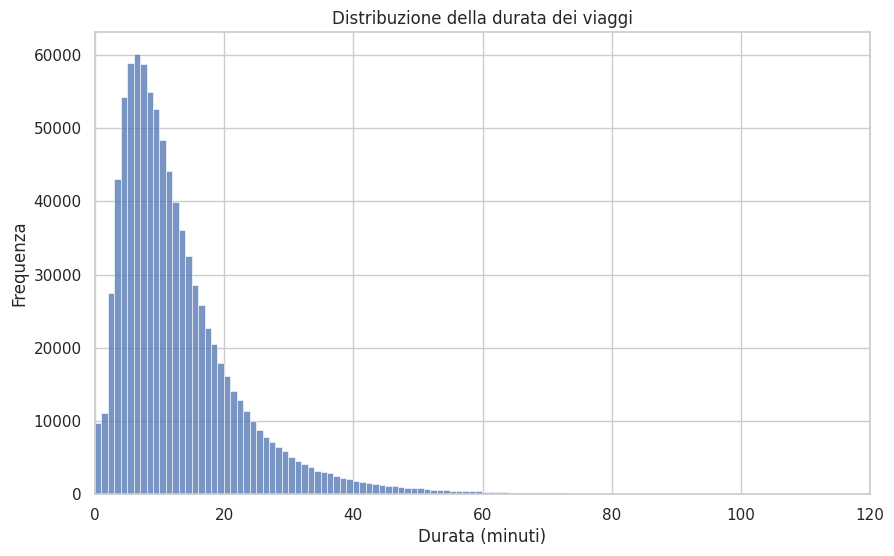

In [22]:
# Visualization of the trip durations"
plt.figure(figsize=(10, 6))
sns.histplot(df[df["duration"] <= 120]["duration"], bins=120)
plt.title("Distribuzione della durata dei viaggi")
plt.xlabel("Durata (minuti)")
plt.ylabel("Frequenza")
plt.xlim(0, 120)
plt.show()

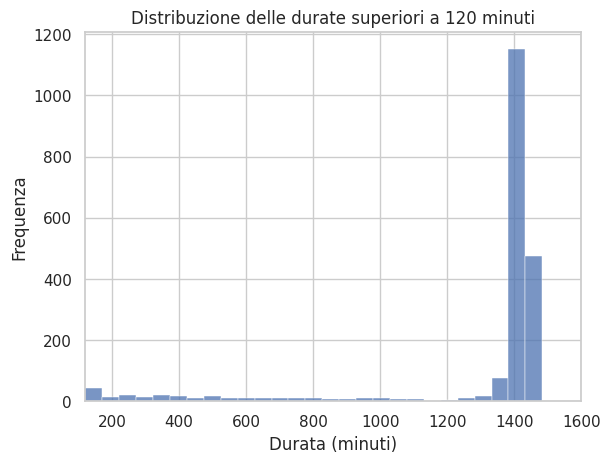

In [23]:
# histogram for duration>120
sns.histplot(df[df["duration"] > 120]["duration"], bins=100)
plt.title("Distribuzione delle durate superiori a 120 minuti")
plt.xlabel("Durata (minuti)")
plt.ylabel("Frequenza")
plt.xlim(120, 1600)
plt.show()

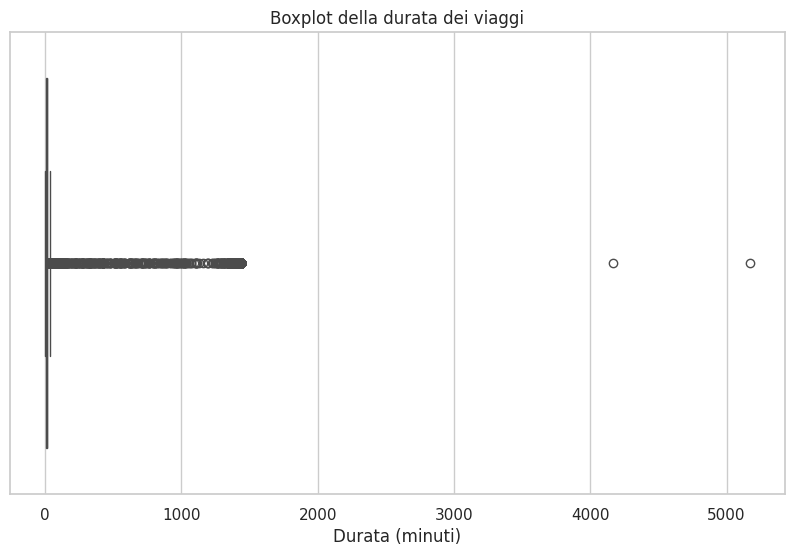

In [24]:
#boxplot of trip duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["duration"])
plt.title("Boxplot della durata dei viaggi")
plt.xlabel("Durata (minuti)")
plt.show()